In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [66]:
dataSet = pd.read_csv("trainingSetLDA.csv") 
dataSet['numLabels'] = np.where(dataSet['Label'].isin(['male']), 1, 0)
dataSet.head()

,Height,Weight,ShoeSize,Label,numLabels
0,174.349910,61.650229,39.510609,female,0
1,164.935084,59.997600,38.733729,female,0
2,160.013237,64.090579,41.050770,female,0
3,164.167748,62.141069,45.760832,female,0
4,164.501485,47.480263,38.060959,female,0


In [67]:
#create a pipeline with Standard scaler and LDA
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

In [84]:
pcf = PCA(n_components=2)
fitResult = pcf.fit_transform(dataSet[['Height','Weight', 'ShoeSize']], dataSet["numLabels"])
fitResult

array([[ -5.86466723,   3.0264546 ],
       [  2.52465938,   0.1752743 ],
       [  3.39307264,  -2.59151445],
       ...,
       [-11.5412762 ,  -1.12837235],
       [ -4.75664872,   3.10361807],
       [ -9.47325369,   3.28685132]])

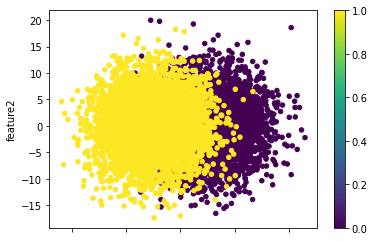

In [92]:
pcaDF = pd.DataFrame(fitResult, columns=['feature1','feature2'])
pcaDF.plot.scatter(x="feature1", y="feature2",c=dataSet["numLabels"], colormap='viridis')

In [69]:
dataSet["numLabels"].unique()

array([0, 1])

In [98]:
ldaFit = LinearDiscriminantAnalysis(n_components=1)
ldaFit.fit(dataSet[['Height','Weight', 'ShoeSize']], dataSet["numLabels"])
ldaFit

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [99]:
out = ldaFit.transform(dataSet[['Height','Weight', 'ShoeSize']])
out.shape

(10000, 1)

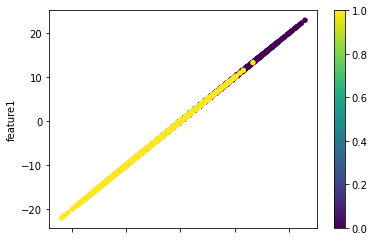

In [100]:
ldaDF = pd.DataFrame(out, columns=['feature1'])
pcaDF.plot.scatter(x="feature1", y=0,c=dataSet["numLabels"], colormap='viridis')